<a href="https://colab.research.google.com/github/arkwith7/aSSIST_ML/blob/main/%EA%B3%BC%EC%A0%9C_1_%E2%80%93_%EC%B6%A9%EC%A0%84%EC%86%8C_%ED%92%88%EC%A7%88_%EC%A7%84%EB%8B%A8_%EB%AA%A8%EB%8B%88%ED%84%B0%EB%A7%81_%EC%84%9C%EB%B9%84%EC%8A%A4_%EA%B0%9C%EB%B0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COLAB matplotlib에 한글이 안 깨지도록**
- **한글 '나눔' 폰트를 설치하자**


In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (48.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120874 files and direc

# '런타임 다시 시작'를 진행

In [1]:
!pip install pandas matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np

#visualization
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
# 브라우저에서 바로 그려지도록
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

In [14]:
# 데이터 생성
np.random.seed(0)
data = {
    '배터리_상태': np.random.normal(80, 10, 100),
    '충전_효율': np.random.normal(90, 5, 100),
    '충전_횟수': np.random.poisson(5, 100),
    '고장_여부': np.random.choice([0, 1], 100, p=[0.8, 0.2])
}
df = pd.DataFrame(data)


In [15]:
df.head(5)

,배터리_상태,충전_효율,충전_횟수,고장_여부
0,97.640523,99.415753,4,0
1,84.001572,83.261205,5,0
2,89.787380,83.647575,11,0
3,102.408932,94.846984,3,0
4,98.675580,84.134383,6,1


In [16]:
# 데이터 기술 통계량
print(df.describe())

           배터리_상태       충전_효율       충전_횟수       고장_여부
count  100.000000  100.000000  100.000000  100.000000
mean    80.598080   90.410065    4.810000    0.220000
std     10.129598    5.199397    2.402419    0.416333
min     54.470102   78.882984    0.000000    0.000000
25%     73.561433   86.272851    3.000000    0.000000
50%     80.940961   90.123274    4.000000    0.000000
75%     87.370774   94.237399    6.000000    0.000000
max    102.697546  101.915724   12.000000    1.000000


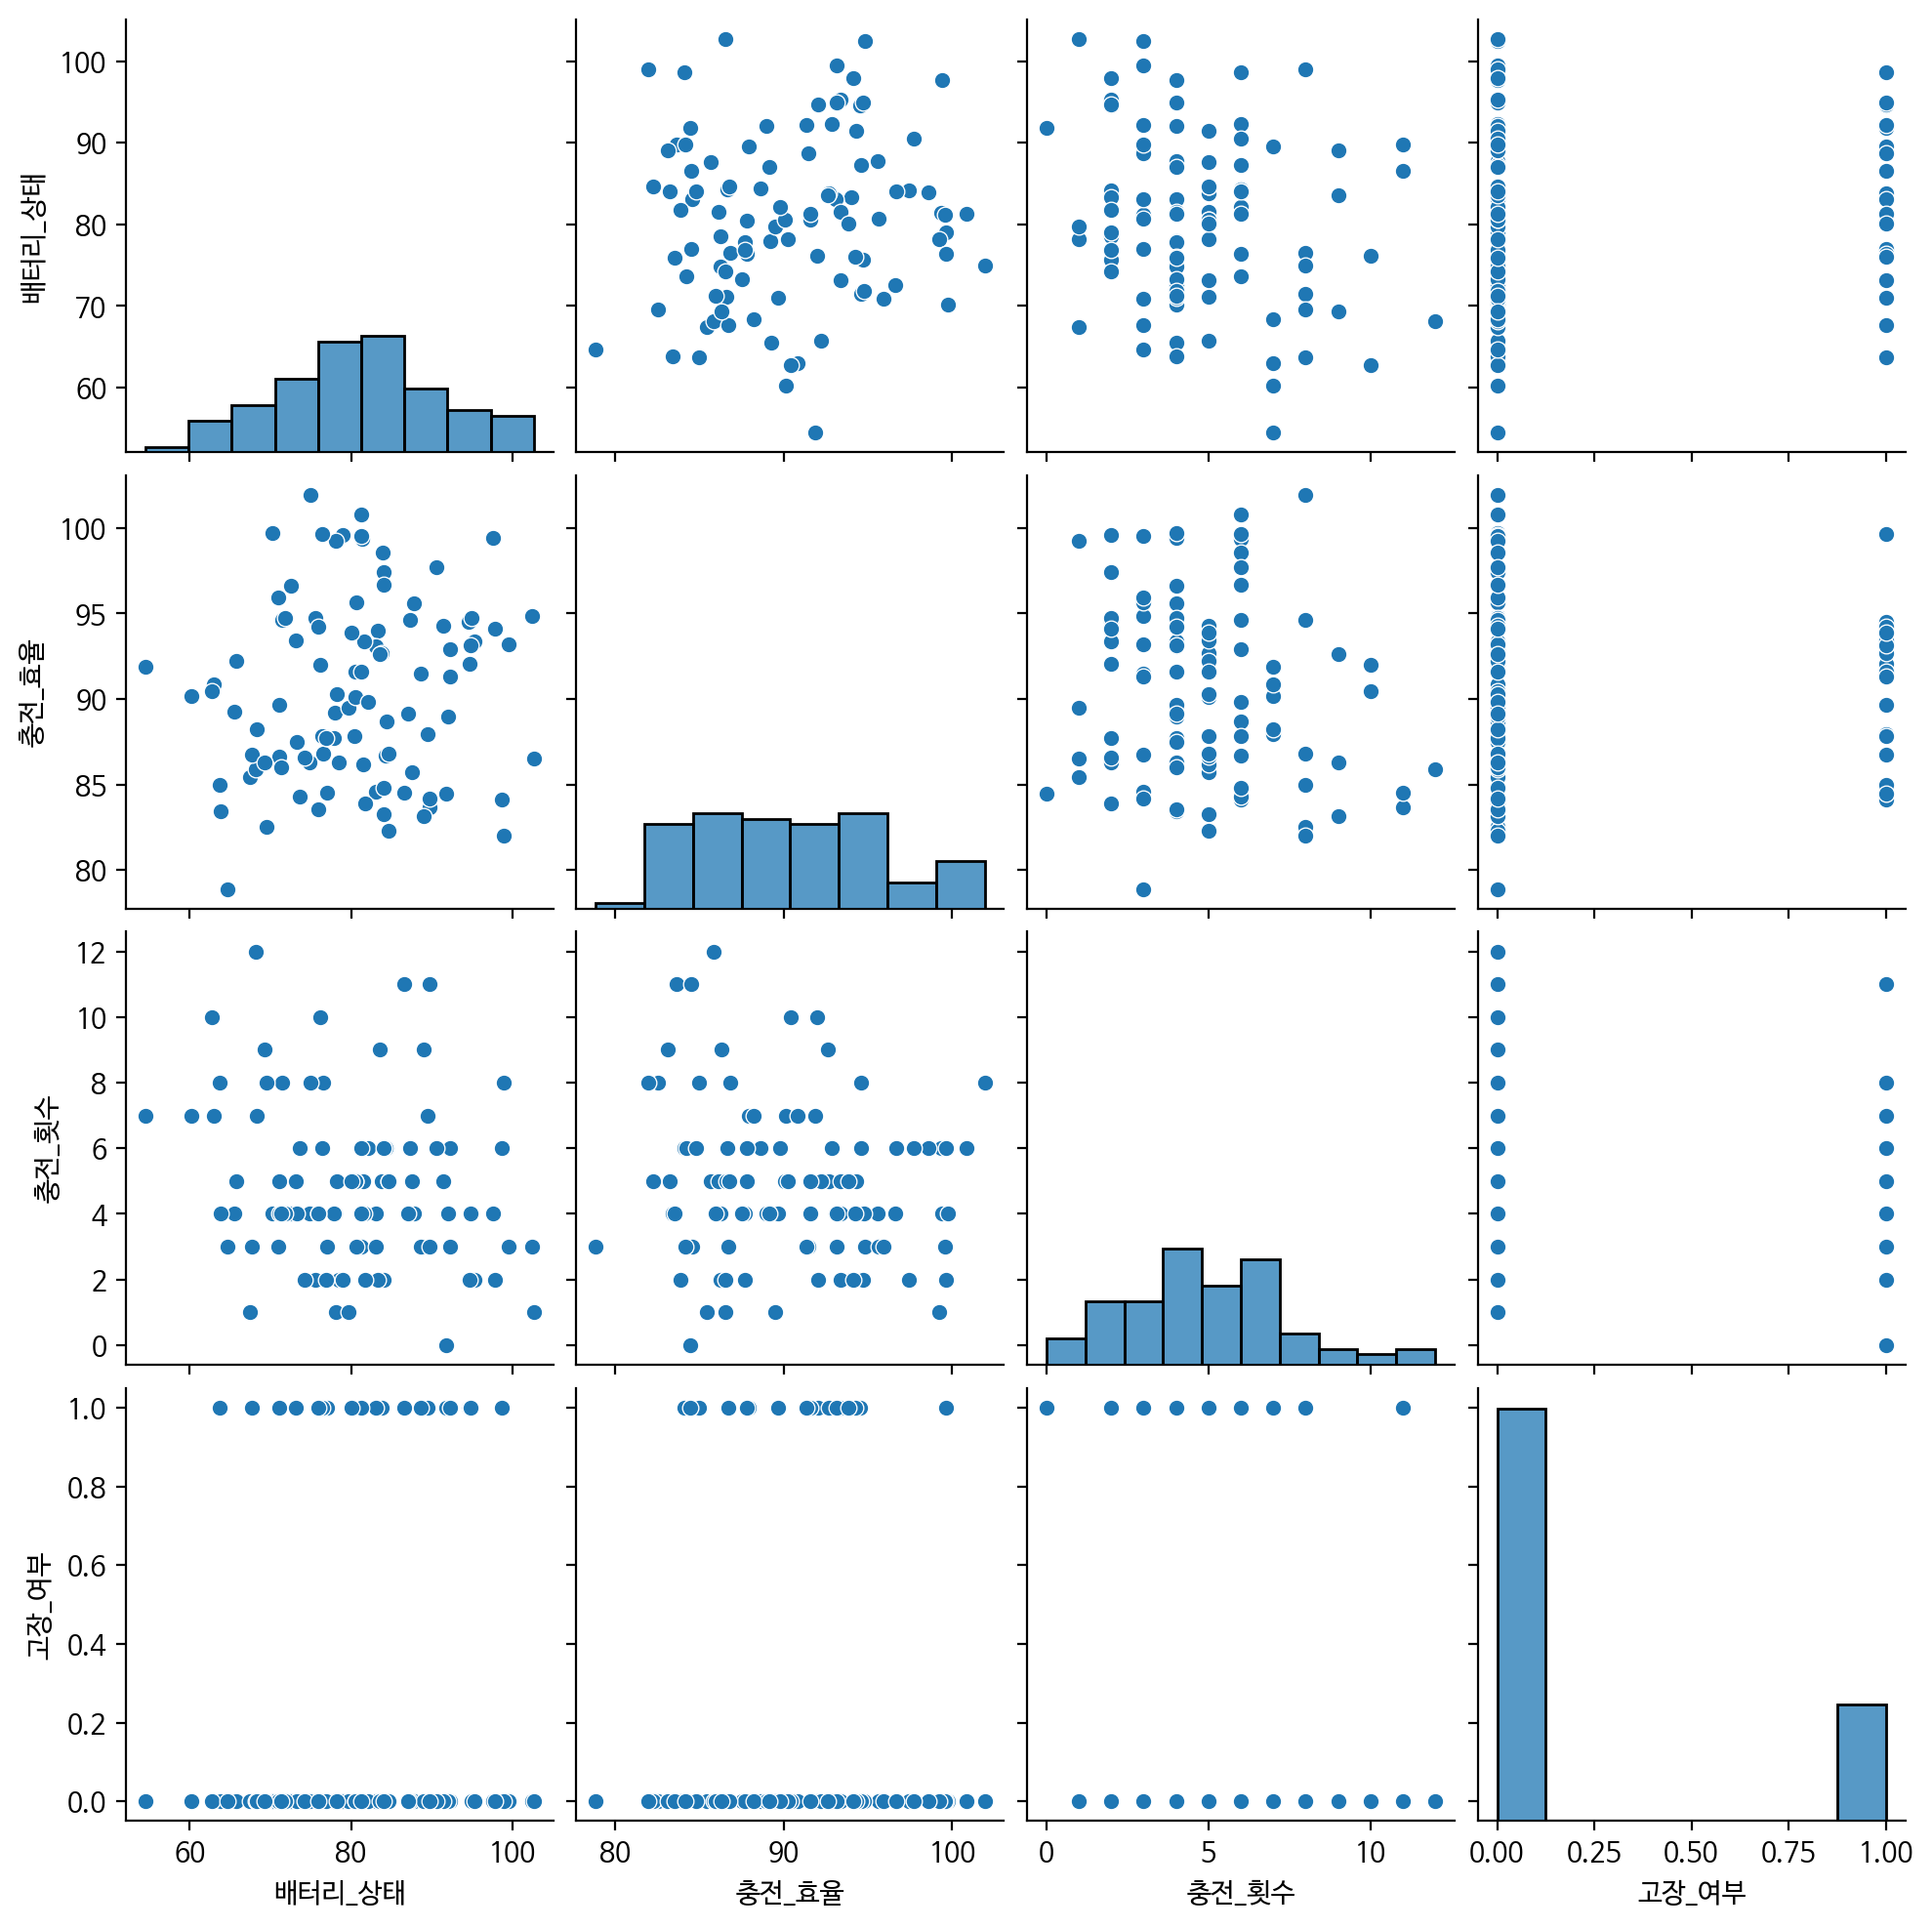

In [17]:
# 탐색적 데이터 분석 (EDA)
sns.pairplot(df)
plt.show()

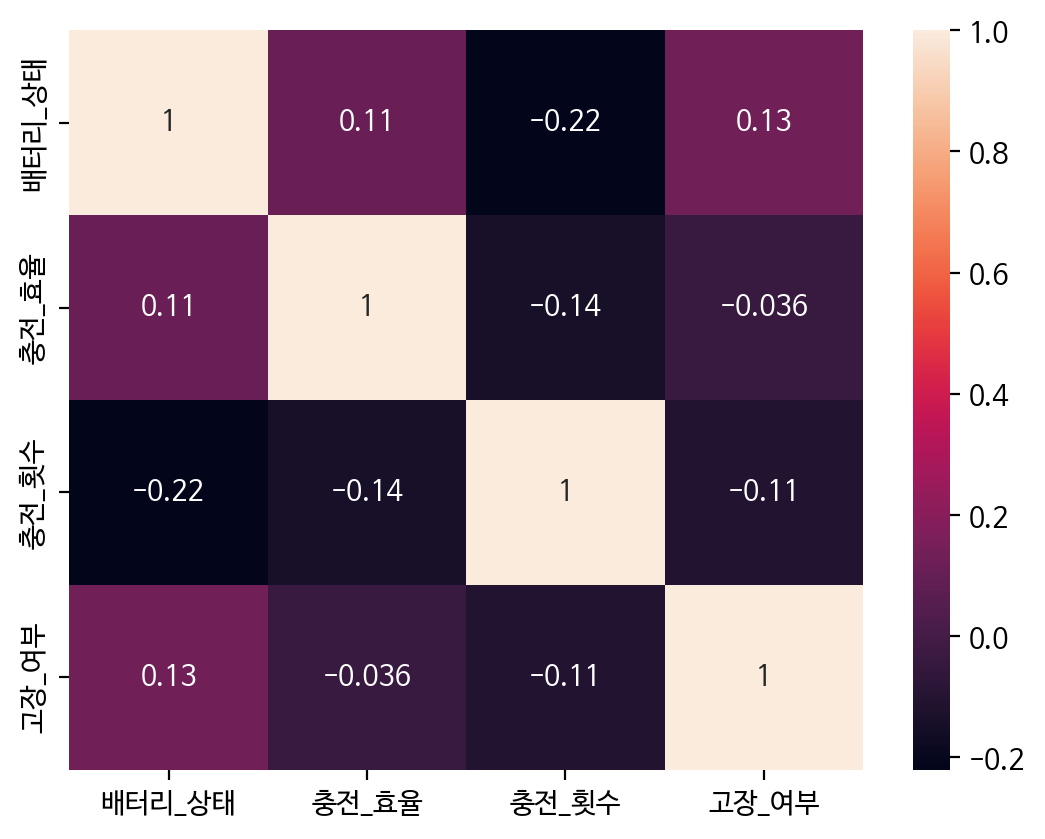

In [18]:
# 상관 분석
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [19]:
# 이상치 탐지
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(outliers)

       배터리_상태      충전_효율  충전_횟수  고장_여부
2   89.787380  83.647575     11      0
4   98.675580  84.134383      6      1
6   89.500884  87.931905      7      1
11  94.542735  94.530223      2      1
15  83.336743  94.012282      2      1
21  86.536186  84.502996     11      1
22  88.644362  91.491191      3      1
26  80.457585  87.824232      5      1
29  94.693588  92.037309      2      1
31  83.781625  92.696246      5      1
39  76.976972  84.534692      3      1
50  71.045334  89.658792      4      1
53  68.193678  85.867807     12      0
57  83.024719  84.600342      3      1
61  76.404468  99.647660      6      1
65  75.982191  94.221815      4      1
66  63.698017  84.998923      8      1
71  81.289829  91.593638      4      1
73  67.651742  86.744872      3      1
75  73.151899  93.407973      5      1
84  94.882522  93.126157      4      1
86  91.787796  84.478083      0      1
91  92.224451  91.335254      3      1
96  80.105000  93.858953      5      1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


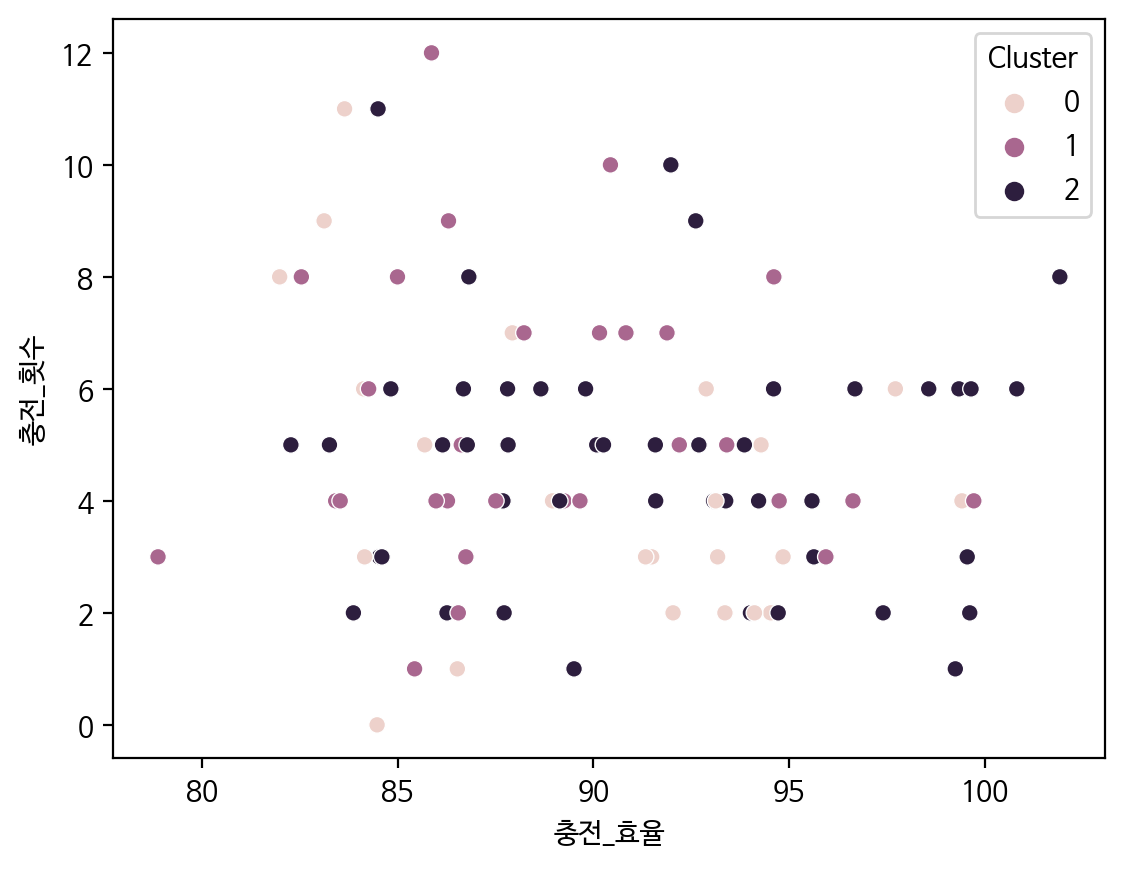

In [20]:
# 군집 분석
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(df[['배터리_상태', '충전_효율', '충전_횟수']])
sns.scatterplot(data=df, x='충전_효율', y='충전_횟수', hue='Cluster')
plt.show()

In [21]:
# 분류 및 예측 모델링
X_train, X_test, y_train, y_test = train_test_split(df[['배터리_상태', '충전_효율', '충전_횟수']], df['고장_여부'], test_size=0.3, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85        22
           1       0.00      0.00      0.00         8

    accuracy                           0.73        30
   macro avg       0.37      0.50      0.42        30
weighted avg       0.54      0.73      0.62        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


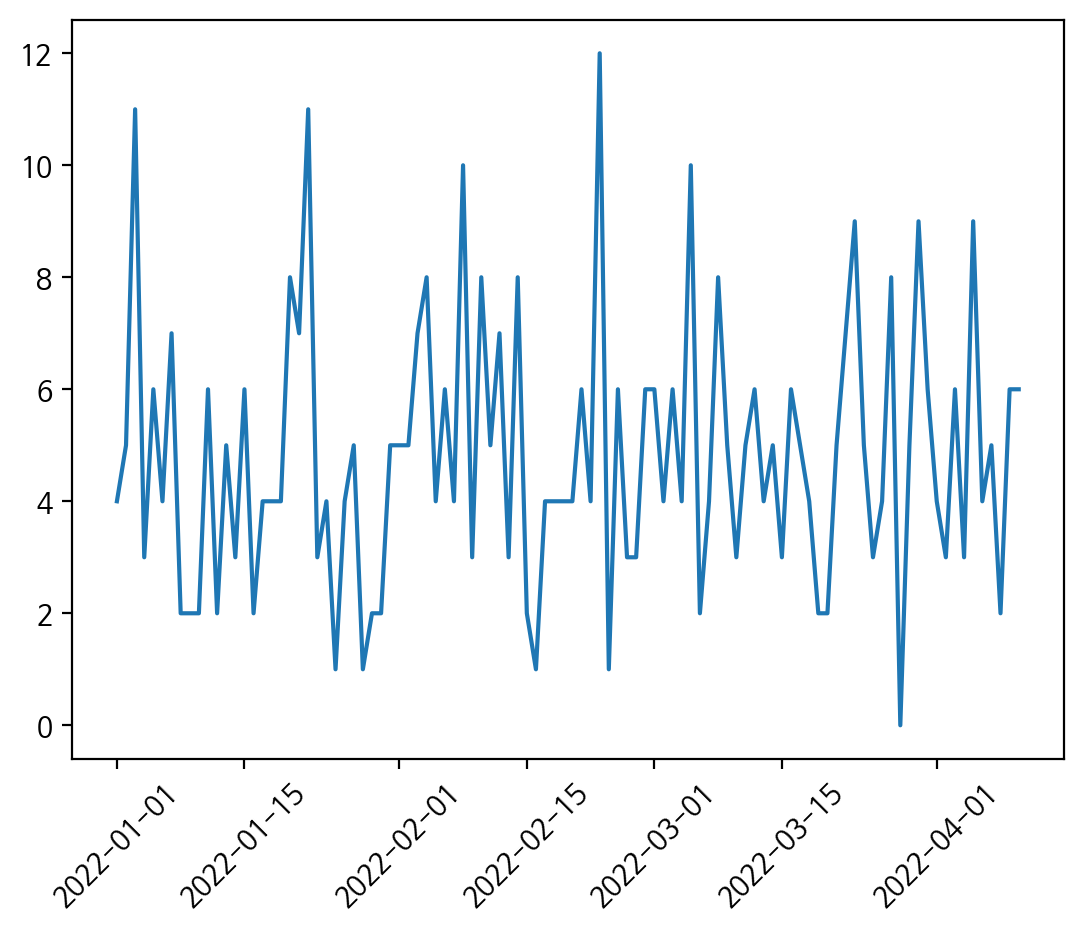

In [23]:
# 시계열 그래프 (가정: 시간에 따른 충전 횟수의 변화를 가정)
df['시간'] = pd.date_range(start='1/1/2022', periods=100)
df.sort_values('시간', inplace=True)
plt.plot(df['시간'], df['충전_횟수'])
plt.xticks(rotation=45)
plt.show()